# import 

In [144]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [145]:
df = pd.read_csv('df2.csv')

# Pipeline

VIRE LE PRICE colineaire au montant , vire le prix totale aussi (juste pour la modelisation ) VIRE product name lenght , l'agorithme peux pas faire de logique dessus , description lenght aussi 


In [146]:
df = df.drop(columns=['product_name_lenght'])

In [147]:
df = df.sample(frac=0.2, random_state=42)

Revoir le standard scaler

In [148]:
df.head()

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price
82976,MG,credit_card,Home,513.25,10.0,3,8.0,1117.84,1.0,22.835,245.0,3.0,256.625
63159,SP,boleto,Automotive,42.99,1.0,3,1.0,58.09,5.0,15.100,70.0,5.0,42.990
33664,PR,credit_card,Automotive,40.52,1.0,0,1.0,56.63,5.0,16.110,781.0,1.0,40.520
11888,BA,voucher,Home,107.96,2.0,3,1.0,77.29,3.0,23.310,337.0,1.0,53.980
54242,PR,boleto,Home,30.90,1.0,3,1.0,46.00,5.0,15.100,113.0,1.0,30.900


In [149]:
# pour le k prototype on fait un OHE uniquement pour visualiser les cluster 
# faire la methode du coude pour avoir le nombre de cluster 
# lancer le k prototype 

# aller sur le github pour k prototype pour avoir des infos
# regarder le code source
# Le repo s'appelle k modes

# mettre le n init à 5 et max_iter à 10 

# ajouter la colonne cluster 
# faire un groupby cluster
# colonne numéric = moyenne ensuite colonne cat = on fait le mode
# faire des radar plot 
# pour visualiser les cluster on doit faire une acp
# fit puis predict 


# pour la pca n component, on peux mettre 0.90 (variance expliqué)

In [150]:
numeric_cols = df.select_dtypes('number').columns
categorical_cols = df.select_dtypes('object').columns

In [151]:
# transformation des données numériques avec MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Faire l'initialisation du kprototypes 

In [152]:
df_copy = df.copy()

In [153]:
cat_col = [df_copy.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

# Methode du coude

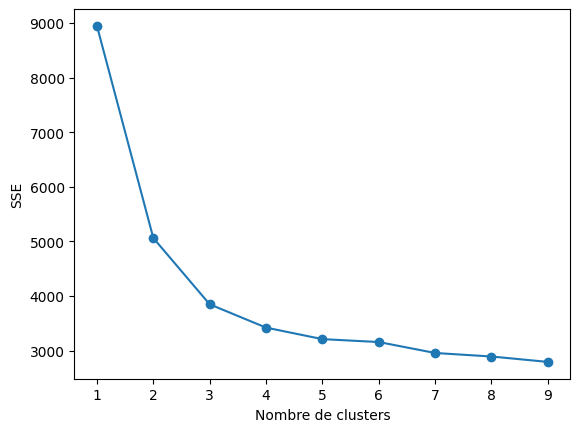

In [154]:
# Exécution de l'algorithme k-prototypes pour différents nombres de clusters
SSE = []
for cluster in range(1, 10):
    kproto = KPrototypes(n_clusters=cluster, init='Cao', n_init=5, verbose=False, n_jobs=-2, max_iter=10)
    clusters = kproto.fit_predict(df_copy, categorical = cat_col)
    SSE.append(kproto.cost_)
    
# Tracé de la somme des distances intra-cluster pour différents nombres de clusters
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()

# K PROTOTYPE AVEC BON NOMBRE DE CLUSTER

In [202]:

# Exécution de l'algorithme k-prototypes avec le nombre optimal de clusters
kproto = KPrototypes(n_clusters = 3, init = 'Cao', n_init = 5, verbose = False, n_jobs = -2, max_iter = 10)
clusters = kproto.fit_predict(df_copy, categorical = cat_col)

# Affichage du résultat
print(clusters)

[1 0 1 ... 2 1 2]


In [203]:
# Ajout de la variable cluster à votre DataFrame
df_copy['Cluster'] = clusters

In [204]:
df_copy.head()

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price,Cluster
82976,MG,credit_card,Home,0.037909,0.037175,1.0,0.304348,0.010115,0.0,0.070894,0.054266,0.117647,0.080999,1
63159,SP,boleto,Automotive,0.002909,0.003717,1.0,0.000000,0.000419,1.0,0.046880,0.010096,0.235294,0.012528,0
33664,PR,credit_card,Automotive,0.002725,0.003717,0.0,0.000000,0.000406,1.0,0.050016,0.189551,0.000000,0.011737,1
11888,BA,voucher,Home,0.007745,0.007435,1.0,0.000000,0.000595,0.5,0.072369,0.077486,0.000000,0.016051,0
54242,PR,boleto,Home,0.002010,0.003717,1.0,0.000000,0.000309,1.0,0.046880,0.020949,0.000000,0.008654,0


In [210]:
mode_col = ['customer_state','payment_type','product_category_name_english']
mean_col = ['prix_total','montant','frequence','payment_installments', 'payment_value','review_score','freight_value','product_description_lenght','product_photos_qty','price']


dict_agg = {}

for col in mode_col:
    dict_agg[f'{col}'] = pd.Series.mode


for col in mean_col:
    dict_agg[f'{col}'] = 'mean'


In [211]:
df_grouped = df_copy.groupby(df_copy['Cluster']).agg(dict_agg)

In [212]:
df_grouped.head(10)

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price
Cluster,,,,,,,,,,,,,
0,SP,credit_card,Home,0.010879,0.011158,1.000000,0.081794,0.001753,0.877950,0.062232,0.198773,0.068490,0.040225
1,SP,credit_card,Home,0.009811,0.010078,0.404943,0.072342,0.001927,0.574135,0.059920,0.154850,0.070075,0.033355
2,RJ,credit_card,Technology,0.012410,0.012666,0.459731,0.091452,0.002165,0.791302,0.067825,0.217141,0.086129,0.044045


3 clusters pas assez


In [213]:
ohe = OneHotEncoder(sparse=False)
categorical_cols = df_grouped.select_dtypes('object').columns
df_ohe = ohe.fit_transform(df_grouped[categorical_cols])

/home/yanis/miniconda3/envs/segmentation_client/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [214]:
# Encoder les variables catégoriques avec OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
onehot_encodedcolumns = [f'{col}{value}' for col, categories in zip(categorical_cols, onehotencoder.categories) for value in categories]
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoded_columns, index=df.index)

# Normaliser les variables numériques
df[numeric_cols] = preprocessing.StandardScaler().fit_transform(df[numeric_cols])

# Combiner les variables numériques et catégoriques encodées en une seule dataframe
df_encoded = pd.concat([df[numeric_cols], onehot_encoded_df], axis=1)

/home/yanis/miniconda3/envs/segmentation_client/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: name 'onehotencoder' is not defined

PCA

In [ ]:
X = df
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

ValueError: could not convert string to float: 'MG'

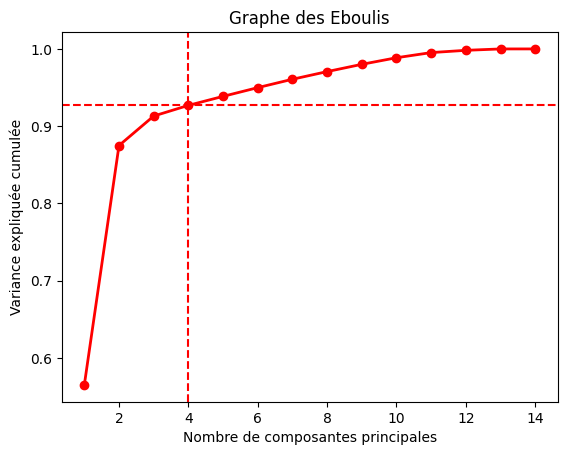

In [ ]:

# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample
# Instancier l'objet PCA avec toutes les composantes principales
pca = PCA()

# Adapter le modèle PCA aux données
pca.fit(X)

# Calculer la variance expliquée par chaque composante
variance_ratio = pca.explained_variance_ratio_

# Calculer la somme cumulée des variances expliquées
cumulative_variances = np.cumsum(variance_ratio)

# Afficher le graphe des Eboulis
plt.plot(np.arange(1, len(variance_ratio)+1), cumulative_variances, 'ro-', linewidth=2)
plt.title('Graphe des Eboulis')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')

# Ajouter des lignes verticales pour représenter les points d'inflexion de la courbe
diff_cumulative_variances = np.diff(cumulative_variances)
change_in_cumulative_variances = np.diff(diff_cumulative_variances)
optimal_components = np.argmax(change_in_cumulative_variances) + 1
plt.axvline(x=optimal_components, color='r', linestyle='--')
plt.axhline(y=cumulative_variances[optimal_components-1], color='r', linestyle='--')

plt.show()

In [ ]:
# Appliquer une PCA à X
pca = PCA()
pca.fit(X)

# Obtenir les composantes principales et les variances associées
components = pca.components_
explained_variances = pca.explained_variance_


# Projeter X dans l'espace PCA
X_transformed = pca.transform(X)

# Récupérer les données d'origine à partir des données transformées
X_recovered = np.dot(X_transformed, components) + pca.mean_

# Afficher les résultats
print("Données d'origine :")
print(X)
print("Données transformées :")
print(X_transformed)
print("Données récupérées :")
print(X_recovered)

Données d'origine :
       customer_state  payment_type  product_category_name_english  \
82976              10             1                             11   
63159              25             0                              2   
33664              17             1                              2   
11888               4             3                             11   
54242              17             0                             11   
...               ...           ...                            ...   
1727               25             0                             10   
66181              22             0                             11   
86715               4             0                             11   
71030              25             1                             15   
50095              18             1                             11   

       prix_total   montant  frequence  payment_installments  payment_value  \
82976    1.323016  1.271872   0.650223              1.914723

<AxesSubplot: >

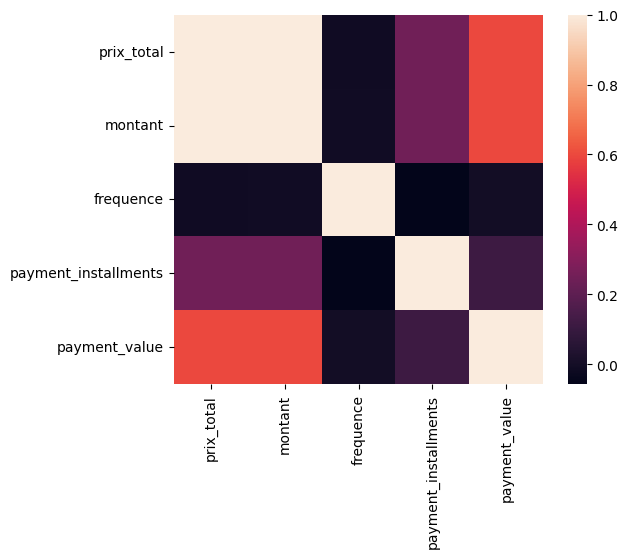

In [ ]:

data_corr =data_olist_final_sample[['prix_total', 'montant', 'frequence', 'payment_installments', 'payment_value']]
cor = data_corr.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


/home/yanis/miniconda3/envs/segmentation_client/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


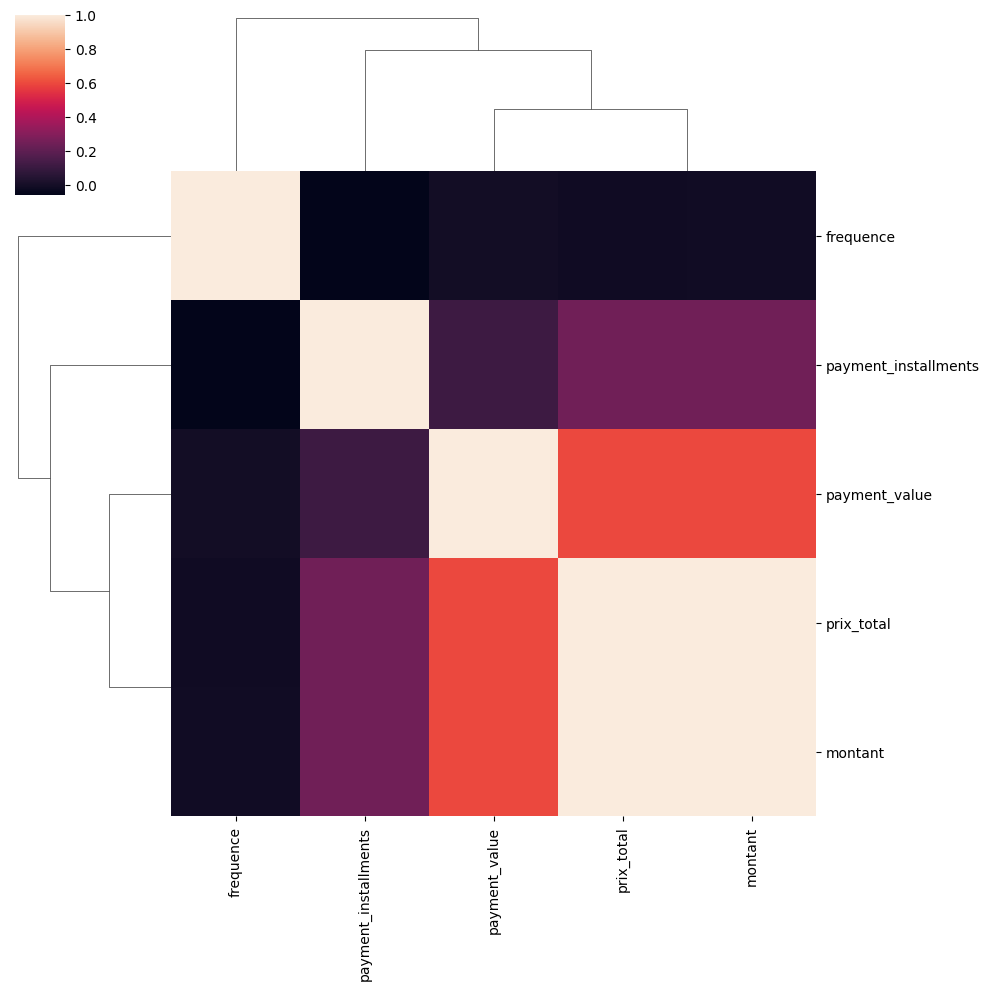

In [ ]:
data_corr =df[['prix_total', 'montant', 'frequence', 'payment_installments', 'payment_value']]
cor = data_corr.corr() #Calculate the correlation of the above variables
sns.clustermap(cor, square = True) #Plot the correlation as heat map

Comment trouver les trois features les plus importantes

Cercle des correlations

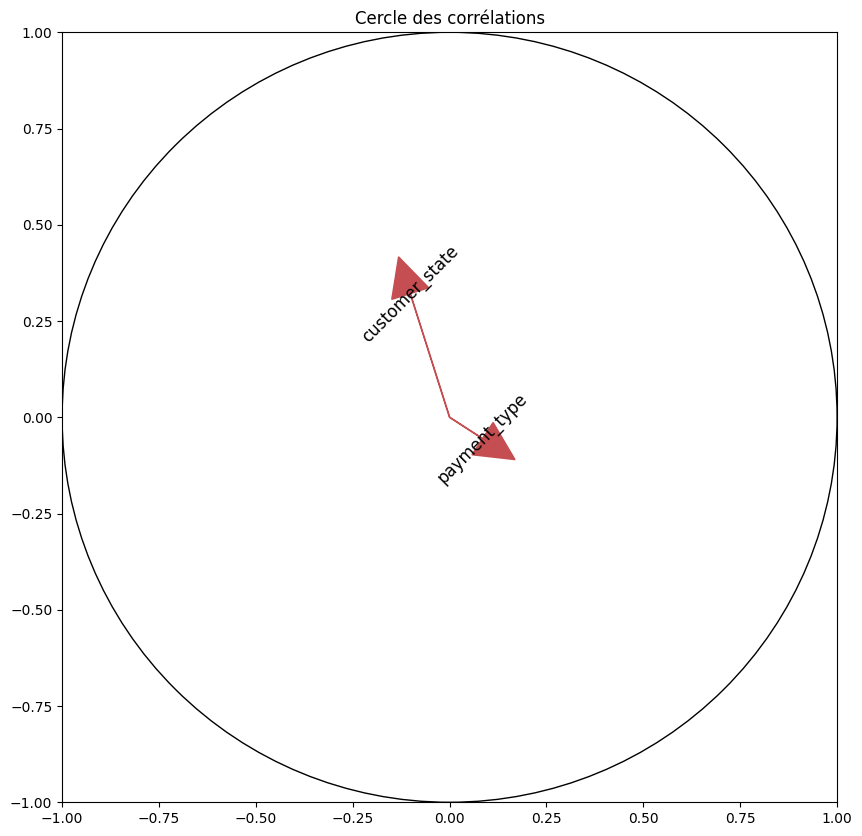

In [ ]:


# Importation des données
data = data_olist_final_sample
# Standardiser les données
data_scaled = StandardScaler().fit_transform(data)

# Réaliser l'ACP
pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Tracer le cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style='white')

# Ajouter un cercle de rayon 1
circle = plt.Circle((0, 0), radius=1, fill=False, edgecolor='black', linewidth=1)
ax.add_artist(circle)

for i in range(loadings.shape[1]):
    ax.annotate(data.columns[i], (loadings[i,0], loadings[i,1]), ha='center', va='center', fontsize=12, color='black', rotation=45)
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], head_width=0.1, head_length=0.1, fc='r', ec='r')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Cercle des corrélations")
plt.show()

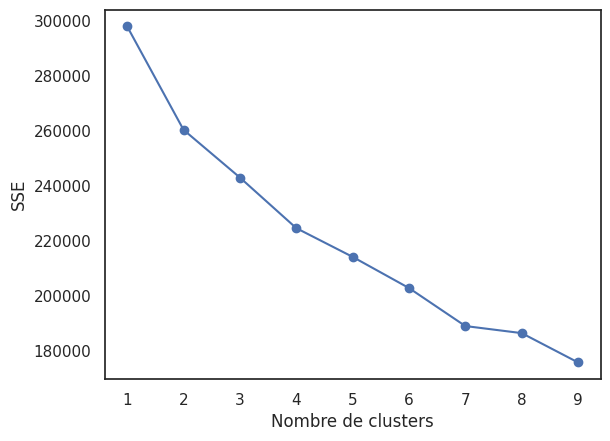

In [ ]:
# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, data_olist_final_sample['price'], test_size=0.2, random_state=42)


# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exécution de l'algorithme k-prototypes pour différents nombres de clusters
SSE = []
for cluster in range(1, 10):
    kproto = KPrototypes(n_clusters=cluster, init='Cao', n_init=1, verbose=False)
    categorical = [0] # colonne des dates de livraison
    clusters = kproto.fit_predict(X_train, categorical=categorical)
    SSE.append(kproto.cost_)
    
# Tracé de la somme des distances intra-cluster pour différents nombres de clusters
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()

Knee Locator

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 10), SSE, curve='convex', direction='decreasing')
k_optimal = kneedle.elbow

# Tracé de la somme des distances intra-cluster pour différents nombres de clusters
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.vlines(k_optimal, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

ModuleNotFoundError: No module named 'kneed'

In [ ]:


# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, data_olist_final_sample['price'], test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Appliquer l'algorithme k-prototypes
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=1, verbose=False)
categorical = [0] # colonne des dates de livraison
clusters = kproto.fit_predict(X_train, categorical=categorical)

# Afficher les résultats
print("Clusters:", clusters)

Clusters: [1 1 1 ... 1 2 1]


en deux dimensions

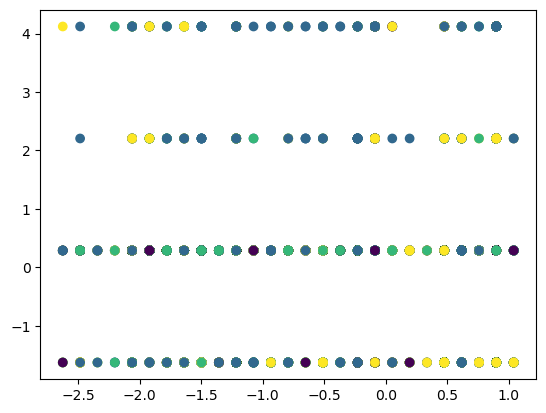

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=clusters)
plt.show()

En 4 dimensions

/home/simplon/miniconda3/envs/k_means/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


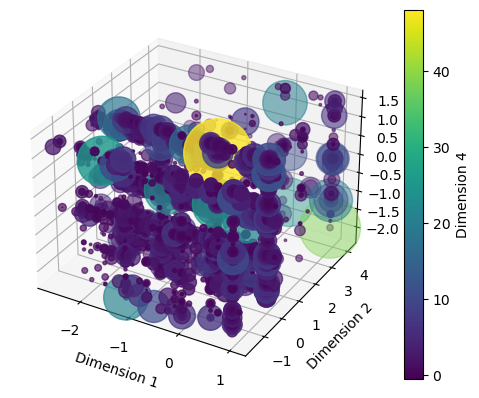

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,3], s=50*X_train[:,3])

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()

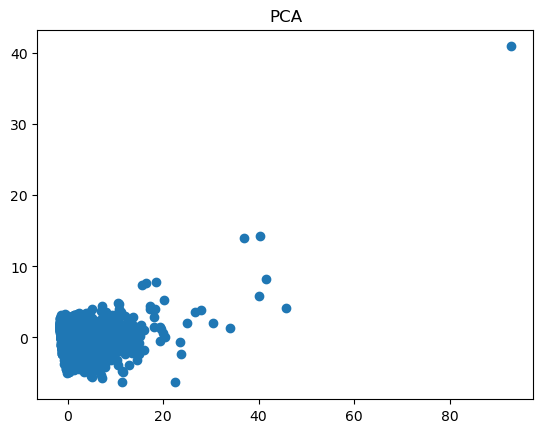

In [ ]:
# Effectuer une PCA sur les données
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

# Tracer les données dans les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.show()


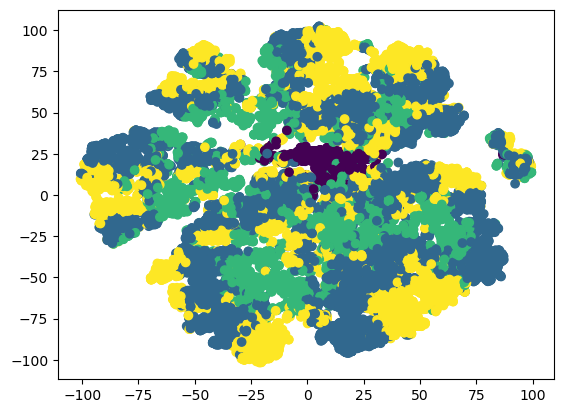

In [ ]:
from sklearn.manifold import TSNE
# On choisit 2 dimensions on s'inspirant de la PCA
tsne_components = 2

# Initialiser le modèle t-SNE
tsne_model = TSNE(n_components=tsne_components, random_state=42)

# Transformer les données en utilisant le modèle t-SNE
X_tsne = tsne_model.fit_transform(X_train)

# Visualiser les données réduites
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters)
plt.show()

Methode de la silhouette

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6079, ncost: 180274.95515929745
Run: 1, iteration: 2/100, moves: 4000, ncost: 176203.95427612975
Run: 1, iteration: 3/100, moves: 2025, ncost: 174904.56672101488
Run: 1, iteration: 4/100, moves: 2036, ncost: 173064.79410636207
Run: 1, iteration: 5/100, moves: 1215, ncost: 172712.71808651267
Run: 1, iteration: 6/100, moves: 426, ncost: 172686.74415536586
Run: 1, iteration: 7/100, moves: 92, ncost: 172685.43539530344
Run: 1, iteration: 8/100, moves: 22, ncost: 172685.17421277636
Run: 1, iteration: 9/100, moves: 7, ncost: 172685.16220597713
Run: 1, iteration: 10/100, moves: 1, ncost: 172685.16114874082
Run: 1, iteration: 11/100, moves: 2, ncost: 172685.15836354863
Run: 1, iteration: 12/100, moves: 0, ncost: 172685.15836354863
Init: initializing centroids
Init: initializing clusters
Starting iterations..

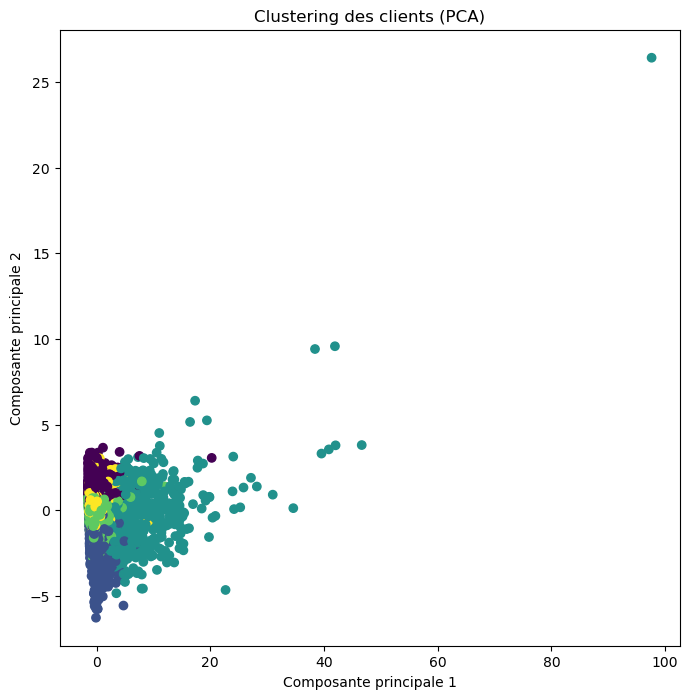

Text(0, 0.5, 't-SNE 2')

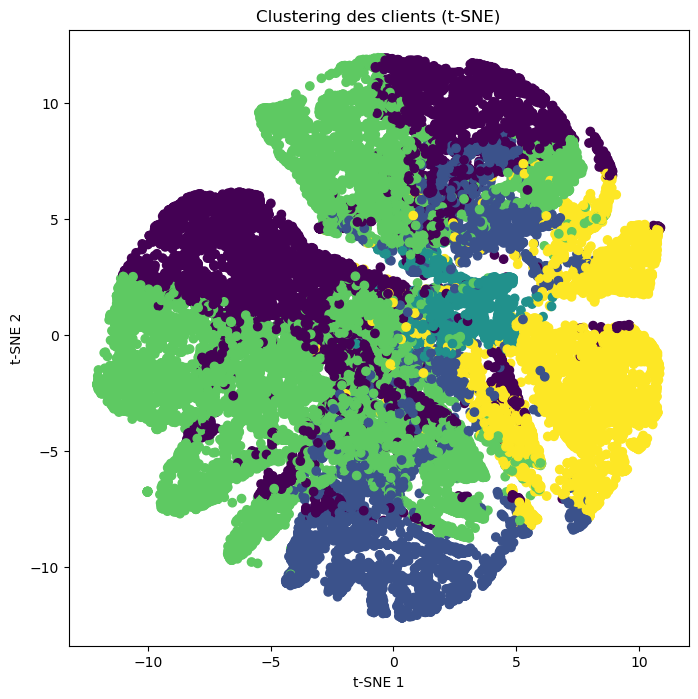

In [ ]:
# Convertir les colonnes catégoriques en entiers
cat_cols = ['customer_state', 'payment_type', 'product_category_name_english']
for col in cat_cols:
    data_olist_final_sample[col] = pd.factorize(data_olist_final_sample[col])[0]

# Sélectionner les colonnes numériques pour le clustering
numerical_cols = ['prix_total', 'montant', 'frequence', 'payment_installments',
                  'payment_value', 'review_score', 'freight_value', 'product_name_lenght',
                  'product_description_lenght', 'product_photos_qty', 'price']

# Sélectionner les colonnes catégoriques pour le clustering
categorical_cols = [data_olist_final_sample.columns.get_loc(col) for col in cat_cols]

# Effectuer le clustering avec k-prototypes
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(data_olist_final_sample[numerical_cols], categorical=categorical_cols)

# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_olist_final_sample[numerical_cols])

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(data_olist_final_sample[numerical_cols])

# Afficher les résultats avec PCA
plt.figure(figsize=(8, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.title("Clustering des clients (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

# Afficher les résultats avec t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters)
plt.title("Clustering des clients (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")


Detection des anomalies

[1 1 1 ... 1 1 1]


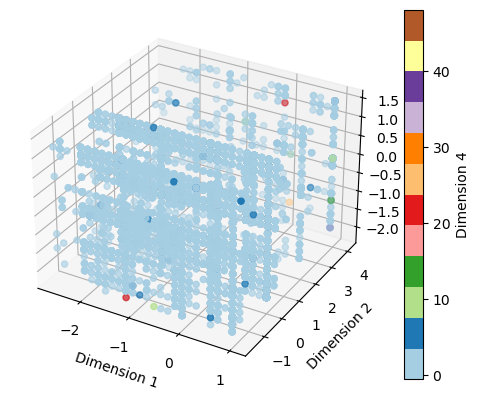

In [ ]:
from sklearn.ensemble import IsolationForest

# Instancier un modèle Isolation Forest
clf = IsolationForest(random_state=0)

# Entraîner le modèle sur les données
clf.fit(X_train)

# Prédire les anomalies
y_pred = clf.predict(X_train)

# Afficher les prédictions
print(y_pred)

# Créer un graphique de dispersion en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=X_train[:, 3], cmap='Paired')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()